In [1]:
import torch
from dataset import CcmDataset
import matplotlib.pyplot as plt
from model import Model
from tqdm.notebook import tqdm
from utils import train_one_epoch, validation
torch.manual_seed(42)
import copy

In [2]:
#import training data
train_data = CcmDataset("data/train.pkl")
validation_data = CcmDataset("data/validation.pkl")

#create torch data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=24, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=24, shuffle=False)

In [3]:
#define model
model = Model(num_rep=32, num_hidden=128) #8 and 15 are the same values that we used in homework. These can be changed as an ablation 
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
num_epochs = 20
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.1, verbose=True)

In [4]:
#train model
train_loss = []
validation_loss = []
model_state_dicts = [] #weights for comparison
for i in range(num_epochs):
    loss = train_one_epoch(model, criterion, optimizer, device, train_loader)
    train_loss.append(loss)
    print(f" Training Loss after epoch {i} : {loss}")
    loss = validation(model, criterion, device, validation_loader)
    validation_loss.append(loss)
    model_state_dicts.append(copy.deepcopy(model.state_dict()))
    print(f" Validation Loss after epoch {i} : {loss}")
    #scheduler.step()

0it [00:00, ?it/s]

 Training Loss after epoch 0 : 0.5413868581807172
 Validation Loss after epoch 0 : 0.48735682169596356


0it [00:00, ?it/s]

 Training Loss after epoch 1 : 0.35734232432312435
 Validation Loss after epoch 1 : 0.3005308210849762


0it [00:00, ?it/s]

 Training Loss after epoch 2 : 0.2893472432538315
 Validation Loss after epoch 2 : 0.2656683375438054


0it [00:00, ?it/s]

 Training Loss after epoch 3 : 0.25230494997015707
 Validation Loss after epoch 3 : 0.23586271703243256


0it [00:00, ?it/s]

 Training Loss after epoch 4 : 0.22882547781423287
 Validation Loss after epoch 4 : 0.2184266448020935


0it [00:00, ?it/s]

 Training Loss after epoch 5 : 0.2103369658191999
 Validation Loss after epoch 5 : 0.19774309794108072


0it [00:00, ?it/s]

 Training Loss after epoch 6 : 0.19516467799743017
 Validation Loss after epoch 6 : 0.18365983168284097


0it [00:00, ?it/s]

 Training Loss after epoch 7 : 0.1791123761622994
 Validation Loss after epoch 7 : 0.17006008327007294


0it [00:00, ?it/s]

 Training Loss after epoch 8 : 0.16578405957531045
 Validation Loss after epoch 8 : 0.15563726425170898


0it [00:00, ?it/s]

 Training Loss after epoch 9 : 0.15203646901581022
 Validation Loss after epoch 9 : 0.14468438426653543


0it [00:00, ?it/s]

 Training Loss after epoch 10 : 0.14182161388021927
 Validation Loss after epoch 10 : 0.1348450928926468


0it [00:00, ?it/s]

 Training Loss after epoch 11 : 0.13104544911119673
 Validation Loss after epoch 11 : 0.12307089070479076


0it [00:00, ?it/s]

 Training Loss after epoch 12 : 0.12199417515485375
 Validation Loss after epoch 12 : 0.11385198682546616


0it [00:00, ?it/s]

 Training Loss after epoch 13 : 0.11427084949833376
 Validation Loss after epoch 13 : 0.10800105581680934


0it [00:00, ?it/s]

 Training Loss after epoch 14 : 0.10546464804146025
 Validation Loss after epoch 14 : 0.10098471244176228


0it [00:00, ?it/s]

 Training Loss after epoch 15 : 0.10136530838078922
 Validation Loss after epoch 15 : 0.09407402575016022


0it [00:00, ?it/s]

 Training Loss after epoch 16 : 0.09456212390904073
 Validation Loss after epoch 16 : 0.08691794176896413


0it [00:00, ?it/s]

 Training Loss after epoch 17 : 0.09042645825280084
 Validation Loss after epoch 17 : 0.08272005369265874


0it [00:00, ?it/s]

 Training Loss after epoch 18 : 0.08454305168103289
 Validation Loss after epoch 18 : 0.07812877744436264


0it [00:00, ?it/s]

 Training Loss after epoch 19 : 0.08099600038042774
 Validation Loss after epoch 19 : 0.07378695408503215


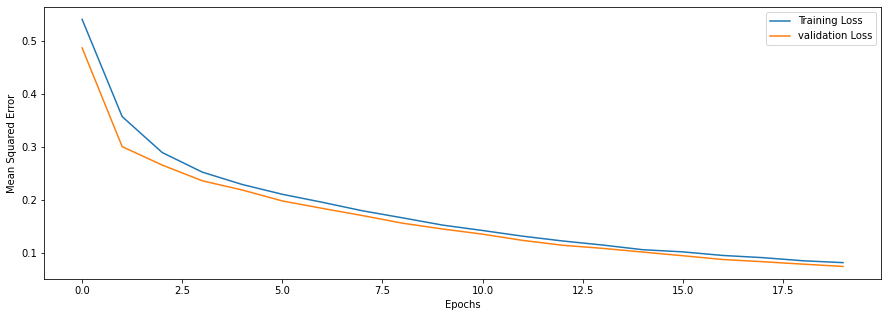

In [5]:
#plot loss curve
plt.figure(figsize=(15,5))
plt.plot(list(range(num_epochs)), train_loss, label = "Training Loss")
plt.plot(list(range(num_epochs)), validation_loss, label = "validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [6]:
#save models for testing
torch.save(model_state_dicts[::4], "models/model.pt")